# Exploring the Seaborn accidents database

Setting up some preliminaries, importing NumPy and friends.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Turn on matplotlib inline so our graphs display in this notebook.

In [2]:
%matplotlib inline

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
crashes = sns.load_dataset('car_crashes')

In [5]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Let's look at summary stats:

In [6]:
crashes.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [22]:
crashes['total'].sum()

np.float64(805.2999999999998)

There are 805 crashes in this dataset. (How do you have .30 of a crash?)

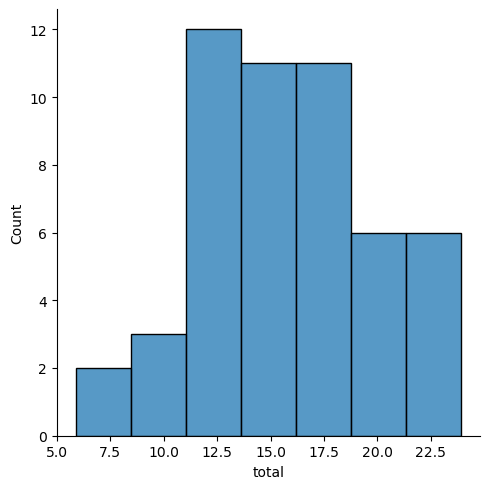

In [7]:
sns.displot(x='total',data=crashes)

The total number of crashes appear to be almost normally distributed. Let's see if it is with the scipy normaltest function with alpha = .05.

In [8]:
from scipy.stats import normaltest
total_crashes = crashes['total'].to_numpy()
normaltest(total_crashes)

NormaltestResult(statistic=np.float64(0.19732083699768993), pvalue=np.float64(0.9060503337210413))

p > 0.5, which supports the null hypothesis that the number of crashes are normally distributed.

Let's calculate the percentage of alcohol-related crashes as part of the total.

Let's see if there's a correlation between alcohol and the total crashes.

In [9]:
crashes['alcohol'].sum() / crashes['total'].sum()

np.float64(0.3094821805538309)

So approximately 31% of crashes are alcohol-related.

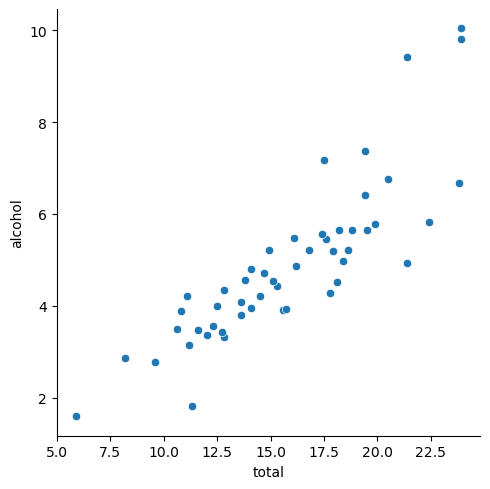

In [10]:
sns.relplot(x='total',y='alcohol',data=crashes)

There seems to be a linear relation, a positive linear correlation. Let's plot a regression line.

<Axes: xlabel='total', ylabel='alcohol'>

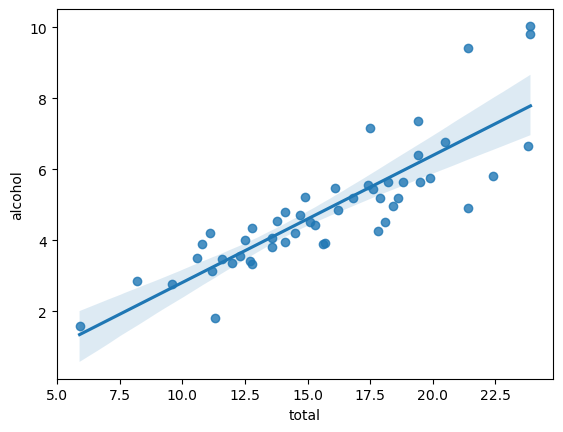

In [11]:
sns.regplot(x='total',y='alcohol',data=crashes)

Let's test this more formally and get the coefficients.

In [12]:
import statsmodels.api as sm
total = crashes['total'].to_numpy()
# Add intercept to x in this regression
total = sm.add_constant(total)
alcohol = crashes['alcohol'].to_numpy()
model = sm.OLS(alcohol,total)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           2.04e-15
Time:                        14:04:30   Log-Likelihood:                -66.688
No. Observations:                  51   AIC:                             137.4
Df Residuals:                      49   BIC:                             141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7608      0.511     -1.490      0.1

The equation is $y = -0.7608 + 0.3577x$. The coefficient p-value is 0, so there is a strong correlation between the two and we can reject the null hypothesis. With such a strong correlation between alcohol-related car crashes and total crashes I would recommend greater countermeasures against drunk driving, such as lowering BAC limits.

Now let's look at speeding. First, the percentage of crashes where speeding was a factor to the total:

In [13]:
crashes['speeding'].sum() / crashes['total'].sum()

np.float64(0.3165379361728549)

So approximately 32% of crashes were speeding-related.

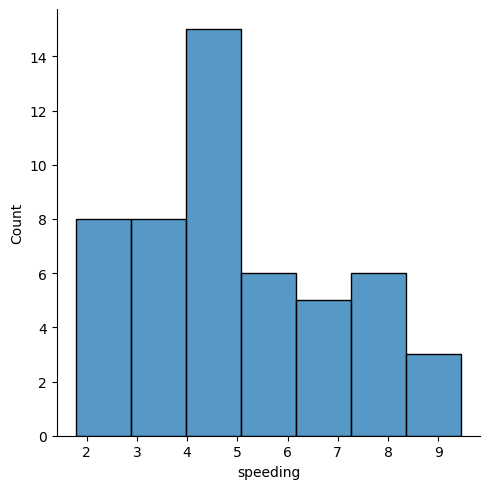

In [14]:
sns.displot(x='speeding',data=crashes)

Again, almost normal, but let's check normality at 0.05.

In [15]:
speeding = crashes['speeding'].to_numpy()
normaltest(speeding)

NormaltestResult(statistic=np.float64(2.4775714106414783), pvalue=np.float64(0.28973582909172746))

p > .05. The null hypothesis holds.

Let's try a .95 confdidence interval. The sample size is large enough that we can use a normal distribution using the sample sd as an estimate of sigma.

In [16]:
from scipy.stats import norm
mean = np.mean(speeding)
std = np.std(speeding)
norm.interval(.95,loc=mean,scale=std)

(np.float64(1.0824480776985217), np.float64(8.913944079164224))

Just for fun, let's compare it to student's T.

In [17]:
from scipy.stats import t
mean = np.mean(speeding)
std = np.std(speeding,ddof=1) #Sample standard deviation
df = len(speeding) - 1 #Degrees of freedom
t.interval(.95,df=df,loc=mean,scale=std)




(np.float64(0.9454317741102543), np.float64(9.050960382752491))

There's a small difference between the two.

Let's show a correlation between total accidents and speeding.

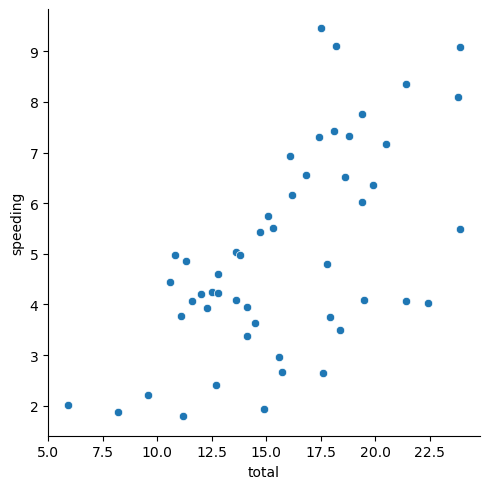

In [18]:
sns.relplot(x='total',y='speeding',data=crashes)

Another apparent positive linear correlation. Let's plot a regression.

<Axes: xlabel='total', ylabel='speeding'>

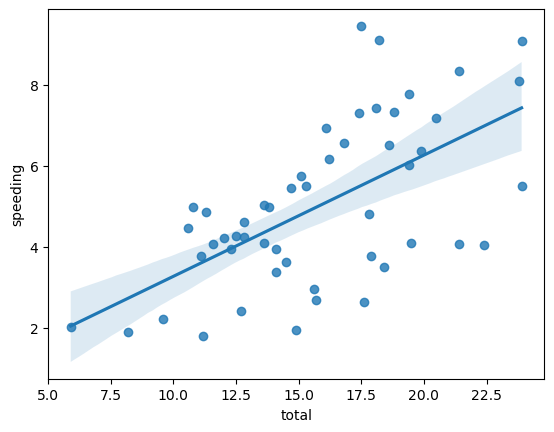

In [19]:
sns.regplot(x='total',y='speeding',data=crashes)

In [20]:
import statsmodels.api as sm
total = crashes['total'].to_numpy()
# Add intercept to x in this regression
total = sm.add_constant(total)
speeding = crashes['speeding'].to_numpy()
model = sm.OLS(speeding,total)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.87e-06
Time:                        14:04:31   Log-Likelihood:                -95.718
No. Observations:                  51   AIC:                             195.4
Df Residuals:                      49   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2713      0.902      0.301      0.7

Once again, x has a p-value of 0. It's interesting in both cases that p > 0.5 for the intercepts in both regressions. The regression equation is: $$ y = 0.2713 + .2994x $$

How many drivers who had accidents were distracted?

In [26]:
crashes['not_distracted'].sum() / crashes['total'].sum()
1 - _

np.float64(0.14040481808021832)

So 14% of drivers were distracted. So the vast majority, approximately 85 percent, weren't.

How many had previous accidents?

In [29]:
crashes['total'].sum() - crashes['no_previous'].sum()

np.float64(91.05099999999982)

So 91 people had a previous accident. How much is that of the total?

In [30]:
_ / crashes['total'].sum()

np.float64(0.11306469638643964)

So approximately 11%. The vast majority of drivers had no previous accidents. I guess there's a first time for everything.

Let's look at insurance premiums vs. losses.

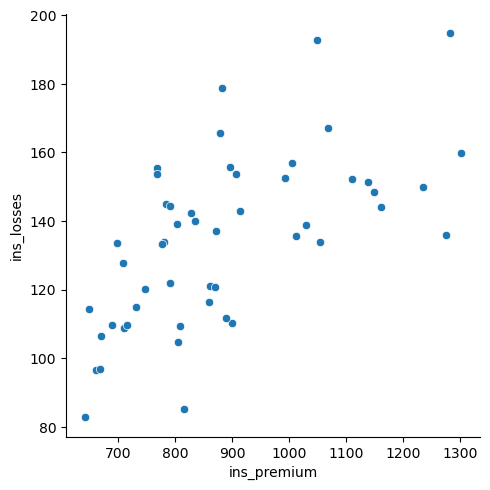

In [31]:
sns.relplot(x='ins_premium', y='ins_losses',data=crashes)

Another linear correlation, it seems. Let's plot yet another regression line.

<Axes: xlabel='ins_premium', ylabel='ins_losses'>

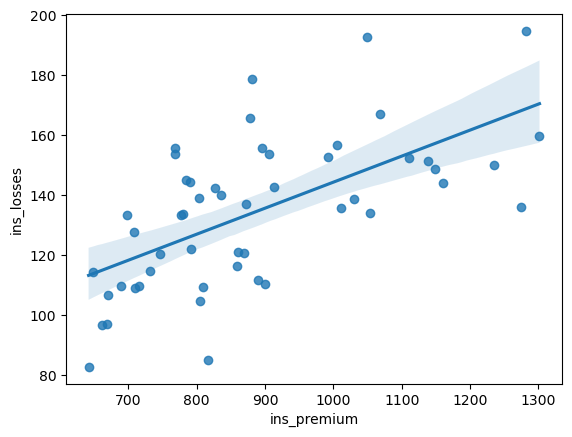

In [32]:
sns.regplot(x='ins_premium', y='ins_losses',data=crashes)

As with the previous regressions, we will test the signifigance at alpha = 0.05

In [33]:
import statsmodels.api as sm
premiums = crashes['ins_premium'].to_numpy()
# Add intercept to x in this regression
premiums = sm.add_constant(premiums)
losses = crashes['ins_losses'].to_numpy()
model = sm.OLS(losses,premiums)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     31.10
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.04e-06
Time:                        14:36:27   Log-Likelihood:                -223.16
No. Observations:                  51   AIC:                             450.3
Df Residuals:                      49   BIC:                             454.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5074     14.075      4.086      0.0

The R-squared is lower, but the p-values constaqnt and the coefficient are both 0 this time. Again, we reject the null hypothesis and there is a correlation. The regression equation is: $$y = 57.5074 + 0.0868x$$

Lets look at the distribution of premiums:

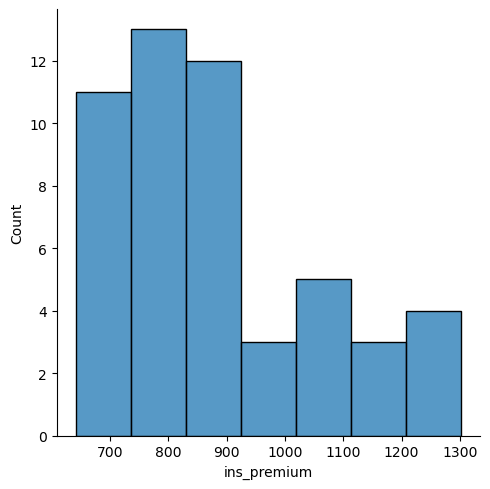

In [35]:
sns.displot(x='ins_premium',data=crashes)

Seems very right-tailed. Lets check the skewness:

In [37]:
from scipy.stats import skew
premiums = crashes['ins_premium'].to_numpy()
skew(premiums)

np.float64(0.7557724779257294)

Skewness is greater than 0, which indicates right-tailed distribution, which we could have known by looking at the histogram.

Let's plot the histogram for insurance losses.

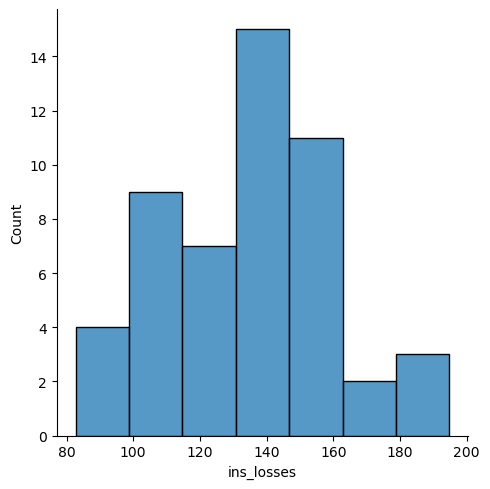

In [38]:
sns.displot(x='ins_losses',data=crashes)

In [39]:
from scipy.stats import skew
losses = crashes['ins_losses'].to_numpy()
skew(losses)

np.float64(0.15923356879999026)

The skewness is still greater than 0, but not by much.